# Life Expectancy Lab

# <font color = red> Problem Statement</font> 



Over the past few years, the overall life expectancy in the United States has decreased. And even more recently, the topic of health has been on everyone's mind. In this lab, I would like to examine the causes for differences in life expectancy across states, and create a complex model to determine if health discrepancies are due to economic reasons, mental health or our healthcare infrastructure. 

# <font color = red> Documentation </font>



## <font color = blue> Abstract  </font>

In this lab, I learned that health insurance coverage plays a large part in life expectancy. Contrary to expectation, other economic factors, such as median income, did not have a significant relationship. However, the results are still meaningful because it emphasizes the importance of health coverage on overall health. Our model showed a relatively large R-squared value, implying that it is quite significant. Using VIFs and White's Test, we also determined that the model was neither multicollinear to a large degree nor heteroskedastic. 

## <font color = blue> Data Dictionary  </font>

| Variable | Values   | Source | Mnemonic |
|----------|----------|--------|---------|
|  Life Expectancy, by State | Years | Statistical Abstract, 2012 | lifeExpect |
|  Median Household Income, by State | 2009 US\$ | US Census Bureau | income |
|  Individuals Below Poverty Line, by State | Percent | Statistical Abstract, 2012 | poverty |
|  Active Physicians, by State | Per 100,000 residents | Statistical Abstract, 2012 | income |
|  Uninsured People, by State | Per 100,000 residents | US Census Bureau | uninsured |
|  Age-adjusted Self-harm Death Rate, by State | Percent | Statistical Abstract, 2012 | selfharm |
|  Census Region | Northeast,South,Midwest,West | Sakai | region|

# <font color = red> Pre-lab </font>



This data was acquired from a published source, so it is secondary data. It is cross sectional, since it includes information across states in a given year.

In determining the independent variables to be used in this lab, 3 main factors were considered: economic causes, mental health, and healthcare infrastructure. First, economics causes of health include the poverty rate in each state and the median income. Intuitively, I would assume that wealthier states will have better access to healthier foods and preventative medicine. Thus, they should have lower rates of hospitalization and better health outcomes. So I expect that the poverty rate will be negatively correlated with life expectancy, while income should be positively correlated. 

Next, mental health can be an indicator of overall physical health as well. Communities where people suffer from mental illness may also deal with low income/high stress situations that exacerbate mental health problems. The data set that encompasses major mental health deficits is the self-harm, or suicide, death rate. I believe this is an imperfect measurement, but there was not enough data available on the incidence of mental illness by state. Nonetheless, it should be negatively correlated with overall life expectancy. 

Lastly, we must take into account healthcare infrastructure. One of the most important components of good health is access to physiciansm whether for prevention or treatment. So the number of active physicians in each state should be positively correlated with life expectancy. However, affordability and coverage also plays an important part. People may not participate in the healthcare system if they don't have health insurance. So the rate of uninsured people should be negatively correlated with health. States have some jurisdiction over government-funded health insurance plans so it would be interesting to note if these discrepancies affect overall health in that state. 

Finally, we will also use dummy variables to consider regional differences in health. 


A tentative specific model for the testable hypothesis is given by: 

LifeExpectancy = $\beta_0$ + $\beta_1$ Income + $\beta_2$ Poverty + $\beta_3$ Physicians + $\beta_4$ Uninsured + $\beta_5$ Self-harm+ $\gamma_2$D2 +  $\gamma_3$D3 + $\gamma_4$D4 + $\epsilon$

where $\beta_1$, $\beta_3$ are positive parameters, while $\beta_2$, $\beta_4$, $\beta_5$ are negative parameters. 


The first region, the Midwest, will be represented by the dummy variable D1, which is included in the estimate for $\beta_0$. It does not appear in the specific model to prevent linear dependence. The second binary dummy variable, D2, will equal 1 if the state is in the Northeast, and 0 otherwise. Similarly, D3 will be a boolean for the Southern region, and D4 will be used for the West. With every data point, at most one $\gamma_i$ will be present in the equation because a state cannot be in two regions at once. 

Finally, $\epsilon$ is a disturbance term. 

The statistical hypotheses that go along with the independent variables in the testable hypothesis are: 

| Null Hypotheses          | Alternative Hypotheses   |
|--------------------------|--------------------------|
| $H_{0, 1}: \beta_1 = 0$  | $H_{A, 1}: \beta_1 > 0$  |
| $H_{0, 2}: \beta_2 = 0$  | $H_{A, 2}: \beta_2 < 0$  |
| $H_{0, 3}: \beta_3 = 0$  | $H_{A, 3}: \beta_3 > 0$  |
| $H_{0, 4}: \beta_4 = 0$  | $H_{A, 4}: \beta_4 < 0$  |
| $H_{0, 5}: \beta_5 = 0$  | $H_{A, 5}: \beta_5 < 0$  |

Dummies for a single concept are not independent, so we must test them together. Since we do not know how the regional parameters will affect health, we can write the statistical hypothesis for the regional dummy variables as: 
 

$H_{0}: \gamma_2 = \gamma_3 = \gamma_4 = 0$  
$H_{A}:$ At least one $\gamma_i \neq 0 $


# <font color = red> Analysis </font>


In [1]:
##
## import packages
##
import numpy as np
import pandas as pd
##
## for modeling
##
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.api import anova_lm
##
## for plotting
##
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel( 'life expectancy.xls', index_col = 'state' )
df.head()

,region,lifeExpect,income,poverty,physicians,uninsured,selfharm
state,,,,,,,
Alabama,South,73.64,42143.5,17.535426,218.000352,13.6,12.5
Alaska,West,74.83,62675.0,9.034571,225.348725,18.6,22.1
Arizona,West,76.10,46237.5,16.522268,213.030214,19.1,16.1
Arkansas,South,74.33,37987.0,18.794279,204.260326,17.7,14.3
California,West,75.86,56466.0,14.166614,270.905011,18.9,9.8


## <font color = blue> Graphs</font>

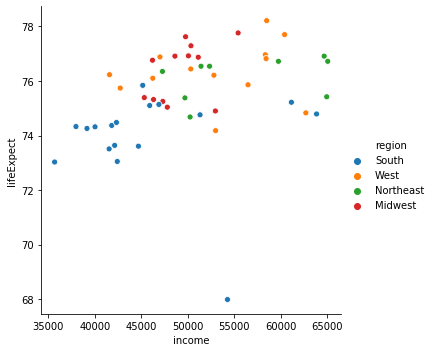

In [3]:
## life expectancy vs income
sns.relplot( y = 'lifeExpect', x = 'income', hue = 'region', data = df )

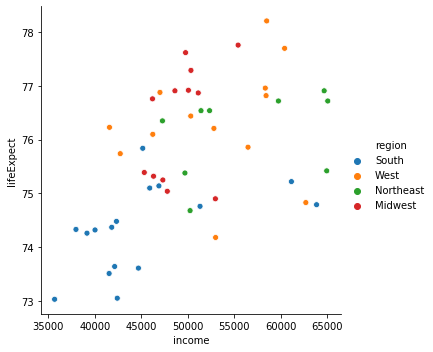

In [4]:
## removing outlier
df_subset = df.query( 'lifeExpect > 70' )

## life expectancy vs income
sns.relplot( y = 'lifeExpect', x = 'income', hue = 'region', data = df_subset )

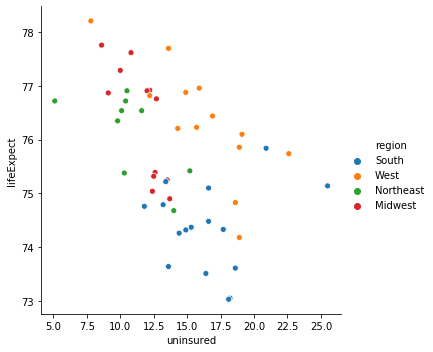

In [5]:
## life expectancy vs uninsured rate
sns.relplot( y = 'lifeExpect', x = 'uninsured', hue = 'region', data = df_subset )

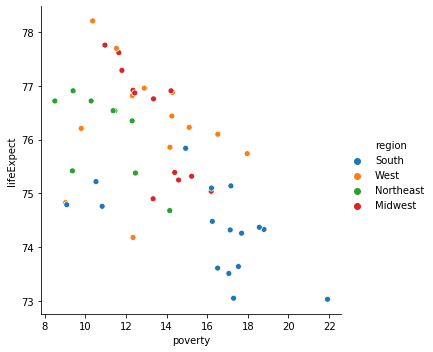

In [40]:
## life expectancy vs poverty rate
sns.relplot( y = 'lifeExpect', x = 'poverty', hue = 'region', data = df_subset )

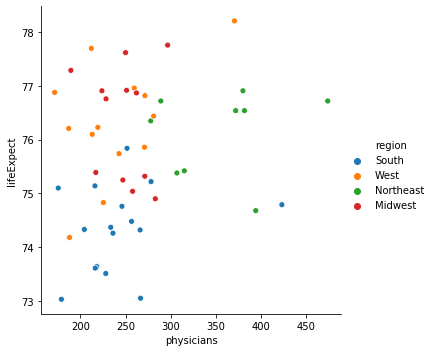

In [41]:
## life expectancy vs physician rate
sns.relplot( y = 'lifeExpect', x = 'physicians', hue = 'region', data = df_subset )

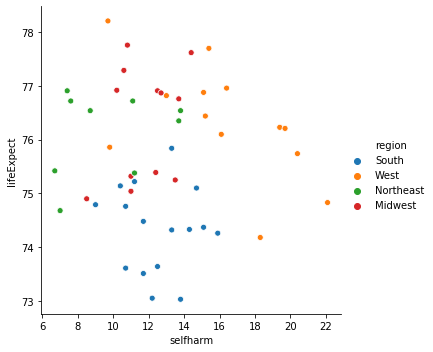

In [42]:
## life expectancy vs low mental health
sns.relplot( y = 'lifeExpect', x = 'selfharm', hue = 'region', data = df_subset )

## <font color = blue> Correlation Matrix & Graph </font>

In [8]:
df_subset.corr()

,lifeExpect,income,poverty,physicians,uninsured,selfharm
lifeExpect,1.000000,0.505759,-0.604719,0.234769,-0.515599,-0.033639
income,0.505759,1.000000,-0.889013,0.518693,-0.379143,-0.286796
poverty,-0.604719,-0.889013,1.000000,-0.492015,0.567257,0.217797
physicians,0.234769,0.518693,-0.492015,1.000000,-0.508110,-0.599792
uninsured,-0.515599,-0.379143,0.567257,-0.508110,1.000000,0.406630
selfharm,-0.033639,-0.286796,0.217797,-0.599792,0.406630,1.000000


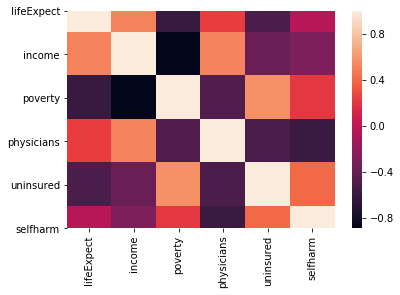

In [9]:
sns.heatmap( df_subset.corr() );

## <font color = blue> OLS Model </font>

In [10]:
## unrestricted model 
formula = 'lifeExpect ~ poverty + income + physicians + selfharm + uninsured + C(region)'
mod = smf.ols( formula, data = df_subset )
reg01 = mod.fit()
print( reg01.summary() )

                            OLS Regression Results                            
Dep. Variable:             lifeExpect   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     8.934
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           5.47e-07
Time:                        19:24:26   Log-Likelihood:                -58.122
No. Observations:                  50   AIC:                             134.2
Df Residuals:                      41   BIC:                             151.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 80

## <font color = blue> Test the null hypothesis for dummy variables </font>

In [12]:
hypothesis = ' ( C(region)[T.Northeast] = 0, C(region)[T.South] = 0 , C(region)[T.West] = 0) '
f_test = reg01.f_test( hypothesis )
fval = round( float( f_test.fvalue ), 3 )
pval = round( float( f_test.pvalue ), 2 )
print( '\nF-Stat: {}'.format( fval ) )
print( '\np-value for F-Test: {}'.format( pval ) )
if pval < 0.05:
    print( '\nSignificant so reject H0' )
else:
    print( '\nInsignificant so do not reject H0' )


F-Stat: 6.765

p-value for F-Test: 0.0

Significant so reject H0


## <font color = blue> Model without Dummies </font>

In [19]:
## regression model without dummy variables
formula = 'lifeExpect ~ poverty + income + physicians + selfharm + uninsured'
mod = smf.ols( formula, data = df_subset )
reg02 = mod.fit()
print( reg02.summary() )

                            OLS Regression Results                            
Dep. Variable:             lifeExpect   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     7.347
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           4.43e-05
Time:                        19:44:43   Log-Likelihood:                -68.175
No. Observations:                  50   AIC:                             148.4
Df Residuals:                      44   BIC:                             159.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.9027      4.030     19.080      0.0

## <font color = blue> Analyze VIFs </font>

In [20]:
x = reg02.model.data.orig_exog.iloc[ :, 1: ] 
corr_matrix = x.corr()
corr_matrix

,poverty,income,physicians,selfharm,uninsured
poverty,1.000000,-0.889013,-0.492015,0.217797,0.567257
income,-0.889013,1.000000,0.518693,-0.286796,-0.379143
physicians,-0.492015,0.518693,1.000000,-0.599792,-0.508110
selfharm,0.217797,-0.286796,-0.599792,1.000000,0.406630
uninsured,0.567257,-0.379143,-0.508110,0.406630,1.000000


In [22]:
indepvars = [ 'poverty', 'income', 'physicians', 'selfharm', 'uninsured' ]
##
## invert the correlation matrix and extract the main diaginal
##
x = np.diag( np.linalg.inv( corr_matrix ) ) 
##
## zip the variable names and the VIFs
##
xzip = zip( indepvars, x ) 
##
## display the zip matrix
##
df_vif = pd.DataFrame( list( xzip ), columns =[ 'Variable', 'VIF' ] )
df_vif

,Variable,VIF
0,poverty,7.641939
1,income,6.442863
2,physicians,2.112659
3,selfharm,1.754352
4,uninsured,2.201502


## <font color = blue> Additional Models </font> 

In [23]:
## regression model 
formula = 'lifeExpect ~  uninsured'
mod = smf.ols( formula, data = df_subset )
reg03 = mod.fit()
print( reg03.summary() )

                            OLS Regression Results                            
Dep. Variable:             lifeExpect   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     17.38
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           0.000127
Time:                        21:27:01   Log-Likelihood:                -75.624
No. Observations:                  50   AIC:                             155.2
Df Residuals:                      48   BIC:                             159.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.0787      0.602    129.723      0.0

In [24]:
formula = 'lifeExpect ~ poverty + uninsured + C(region)'
mod = smf.ols( formula, data = df_subset )
reg04 = mod.fit()
print( reg04.summary() )

                            OLS Regression Results                            
Dep. Variable:             lifeExpect   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     15.11
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           1.23e-08
Time:                        21:28:44   Log-Likelihood:                -58.357
No. Observations:                  50   AIC:                             128.7
Df Residuals:                      44   BIC:                             140.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 78

## <font color = blue> Restricted Model </font> 

In [26]:
formula = 'lifeExpect ~  1'
mod = smf.ols( formula, data = df_subset )
reg05 = mod.fit()
print( reg05.summary() )

                            OLS Regression Results                            
Dep. Variable:             lifeExpect   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Thu, 30 Apr 2020   Prob (F-statistic):                nan
Time:                        21:29:30   Log-Likelihood:                -83.350
No. Observations:                  50   AIC:                             168.7
Df Residuals:                      49   BIC:                             170.6
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.6580      0.183    413.257      0.0

## <font color = blue> Heteroskedasticity </font> 

In [29]:
X = reg02.model.data.orig_exog ##.iloc[ :, 1: ]
print( X.head() )
print( '\n' )
print( reg02.resid.head() )
white = sm.stats.diagnostic.het_white( reg02.resid, X )
##
## return white stats
##
ret = [ 'Lagrange Multiplier Test Statistic', 'p-Value', 'F-Statistic', 'p-Value' ]
xzip01 = zip( ret, white ) 
##
## display the zip matrix
##
print( "\nWhite's Test for Heteroskedasticity" )
df_white = pd.DataFrame( list( xzip01 ), columns = [ 'Stats', 'Values' ] )
df_white

            Intercept    poverty   income  physicians  selfharm  uninsured
state                                                                     
Alabama           1.0  17.535426  42143.5  218.000352      12.5       13.6
Alaska            1.0   9.034571  62675.0  225.348725      22.1       18.6
Arizona           1.0  16.522268  46237.5  213.030214      16.1       19.1
Arkansas          1.0  18.794279  37987.0  204.260326      14.3       17.7
California        1.0  14.166614  56466.0  270.905011       9.8       18.9


state
Alabama      -1.448488
Alaska       -1.994531
Arizona       1.217919
Arkansas     -0.062941
California    0.875630
dtype: float64

White's Test for Heteroskedasticity


,Stats,Values
0,Lagrange Multiplier Test Statistic,32.302013
1,p-Value,0.040185
2,F-Statistic,2.646511
3,p-Value,0.008350


In [28]:
##
## fixing standard errors using HC1 for covariance type
##
formula = 'lifeExpect ~ poverty + income + physicians + selfharm + uninsured'
##
## specify HC1 in the fit() function
##
reg06 = smf.ols( formula, data = df ).fit( cov_type = 'HC1' )
print( reg06.summary() )

                            OLS Regression Results                            
Dep. Variable:             lifeExpect   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     8.887
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           6.31e-06
Time:                        21:42:32   Log-Likelihood:                -74.043
No. Observations:                  51   AIC:                             160.1
Df Residuals:                      45   BIC:                             171.7
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.9713      4.111     20.183      0.0

## <font color = blue> Model Portfolio  </font> 

In [33]:
##
## create a variable to hold the model names; this is a list
## 
model_names = [ 'Model ' + str( i ) for i in range( 1, 6 ) ]
##
## create a variable to hold the statistics to print; this is a dictionary
##
info_dict = { '\nn': lambda x: "{0:d}".format( int( x.nobs ) ),
              'R2 Adjusted': lambda x: "{:0.3f}".format( x.rsquared_adj ),
              'AIC': lambda x: "{:0.2f}".format( x.aic ),
              'F': lambda x: "{:0.2f}".format( x.fvalue ),
}
##
## create the portfolio summary table
##
summary_table = summary_col( [ reg01, reg02, reg03, reg04, reg05 ],
            float_format = '%0.2f',
            model_names = model_names,
            stars = True, 
            info_dict = info_dict 
)
summary_table.add_title( 'Summary Table for Life Expectancy Models' )
print( summary_table )

             Summary Table for Life Expectancy Models
                       Model 1  Model 2  Model 3  Model 4  Model 5 
-------------------------------------------------------------------
C(region)[T.Northeast] -0.51                      -0.53            
                       (0.47)                     (0.38)           
C(region)[T.South]     -1.21***                   -1.24***         
                       (0.40)                     (0.37)           
C(region)[T.West]      0.57                       0.38             
                       (0.51)                     (0.39)           
Intercept              80.74*** 76.90*** 78.08*** 78.88*** 75.66***
                       (3.90)   (4.03)   (0.60)   (0.71)   (0.18)  
income                 -0.00    0.00                               
                       (0.00)   (0.00)                             
physicians             -0.00    -0.00                              
                       (0.00)   (0.00)                        

## <font color = blue> Elasticities </font> 

In [35]:
## Income
slopes = [ reg01.params.income,  reg02.params.income, reg06.params.income]
mean_ray = df_subset.income.mean()/df_subset.lifeExpect.mean()
eta = np.array( slopes ) * mean_ray
print( eta )

[-0.01144214  0.02475523  0.00527641]


In [36]:
## Poverty 
slopes = [ reg01.params.poverty,  reg02.params.poverty, reg04.params.poverty, reg06.params.poverty]
mean_ray = df_subset.poverty.mean()/df_subset.lifeExpect.mean()
eta = np.array( slopes ) * mean_ray
print( eta )

[-0.02613291 -0.0207133  -0.01953296 -0.04845937]


In [37]:
## Uninsured Rate
slopes = [ reg01.params.uninsured,  reg02.params.uninsured,reg03.params.uninsured, reg04.params.uninsured, reg06.params.uninsured]
mean_ray = df_subset.uninsured.mean()/df_subset.lifeExpect.mean()
eta = np.array( slopes ) * mean_ray
print( eta )

[-0.016902   -0.02548797 -0.03199593 -0.01789989 -0.023145  ]


In [38]:
## Physicians
slopes = [ reg01.params.physicians,  reg02.params.physicians, reg06.params.physicians]
mean_ray = df_subset.physicians.mean()/df_subset.lifeExpect.mean()
eta = np.array( slopes ) * mean_ray
print( eta )

[-0.0019274  -0.0072216  -0.03278486]


In [39]:
## Self-harm Rate 
slopes = [ reg01.params.selfharm,  reg02.params.selfharm, reg06.params.selfharm]
mean_ray = df_subset.selfharm.mean()/df_subset.lifeExpect.mean()
eta = np.array( slopes ) * mean_ray
print( eta )

[-0.00635293  0.01221539  0.00203178]


# <font color = red> Final Analysis and Conclusions </font>

Beginning with the graphs, we can decipher a strong negative relationship between life expectancy and the uninsured rate, and a somewhat negative relationship between life expectancy and poverty. There was also a slight positive relationship between life expectancy and income. This is what we expected- health and length of life are often correlated with wealth. Looking at the graphs correlating our dependent variable with the number of active physicians and the self-harm rate, there was not a meaningful relationship to be found. 

The correlation matrix shows a somewhat strong negative correlation between poverty rate and income, with a value of -0.889013. This was expected since intuitively these variables do exhibit some level of multicollinearity. In order to examine the degree of collinearity, we calculated the variance inflation factors. Since all VIFs were less than 10, we can say that there is not a high degree of collinearity. 

Since this data is cross-sectional, there was also a test conducted for heteroskedasticity. Using White's Test, we found that the p-values were both less than 0.05. So we can reject heteroskedasticity. The variance of the
disturbance term is constant, keeping in line with our Classical Assumptions. 

Next, we tested the null hypothesis for the regional dummy variables. The p-value for the F-test implied that $H_0$ can be rejected for the regional dummy variables- all $\gamma_i$ are not equal to zero. So the dummy variables are statistically significant. 

In analyzing our model portfolio, we can determine that Model 4 is the best at explaining life expectancy. It includes the dummy variables for region, and two independent variables: percent of people below the poverty line and the uninsured rate. Several factors were taken into account. First, Model 4 has the largest adjusted R-squared value of 0.590. This means that 59% of the differences in life expectancy can be explained by the variables in this model. Additionally, the F-statistic showed a similar picture. The p-value of the F-Test for Model 4 was 1.23e-08, which was the lowest of all the models. The AIC, or "badness" of fit, also points to this model being the best because its AIC value of 128.71 was the lowest of all the models. 

Using Model 4 in our analysis, we can definitively reject the null hypothesis for uninsured rate. There is a statistically significant negative relationship between life expectancy and lack of health insurance coverage. As for the other variables, we cannot reject the null hypothesis. 

Scanning the calculated elasticities, we can say that life expectancy is inelastic with respect to each variable. None of the absolute values of the elasticities are greater than 1. 

In conclusion, we determined that we can reject the null hypothesis for the regional dummy variables and the uninsured rate. These variables are important in our analysis on life expectancy. States with more uninsured people have a lower life expectancy. Over the past few years, life expectancy in the US has been decreasing, and working with this model has several practical benefits in examining the reasons behind this trend. Many Americans get health insurance through their employer, so there may be negative effects that the recent increase in unemployment due to the pandemic would have on the overall health of Americans- even those who don't contract the virus. 